In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
# Change VClass into ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses)

df['trans_type'] = df['trans'].apply(lambda x: x.split()[0]) # split the string and take the first token

### Example 1 - Bar chart with second variable mean (one categorical & one quantitative variable)

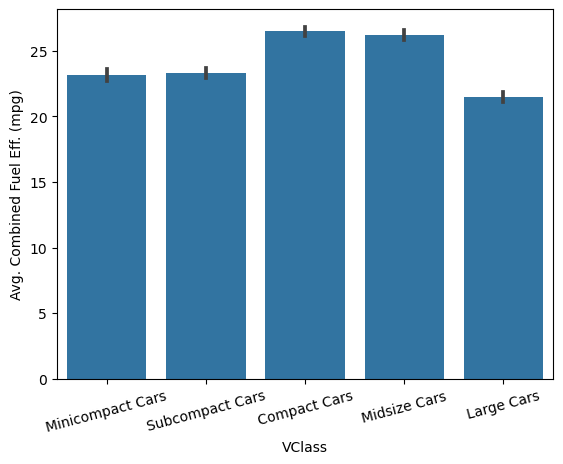

In [5]:
base_color = sns.color_palette()[0]
sns.barplot(data=df, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

By default, `seaborn` applies a 95% confidence interval for error bars. We can remove those or change the error bar statistic.

See [seaborn's error bar tutorial](https://seaborn.pydata.org/tutorial/error_bars.html) for a great read on how to understand, interpret, and choose methods for error bars.

### Example 1A - Remove error bars

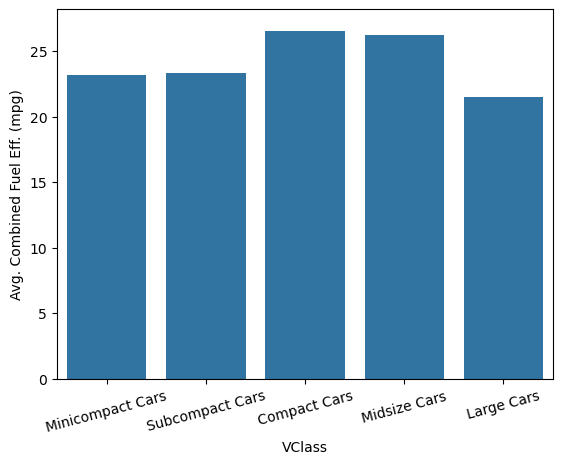

In [6]:
sns.barplot(data=df, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

### Example 1B - Change the error bar statistic to std

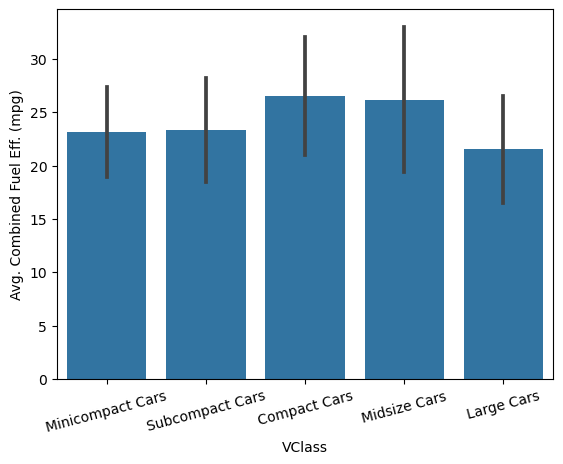

In [7]:
sns.barplot(data=df, x='VClass', y='comb', color=base_color, errorbar='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

### Example 1C - Multivariate example (two categorical & one quantitative)

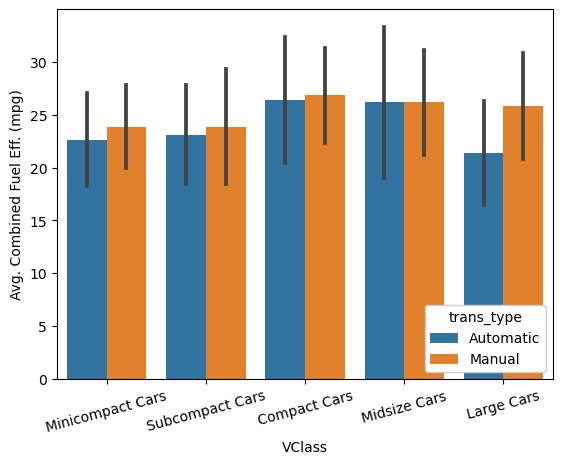

In [15]:
sns.barplot(data=df, x='VClass', y='comb', hue='trans_type', errorbar='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')
plt.legend(loc=4, framealpha=1, title='trans_type'); # lower right, no transparency

### Example 1D

Text(0.5, 0, 'Vehicle Class')

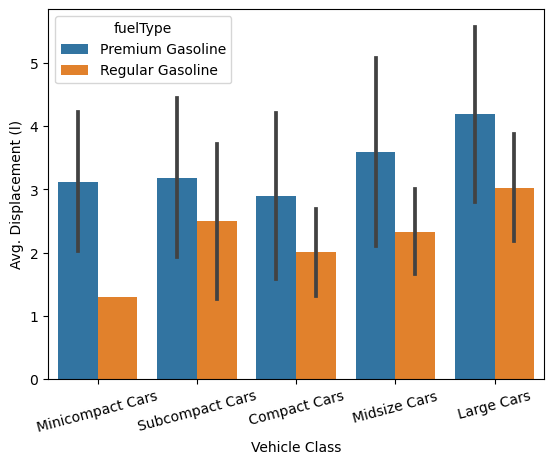

In [20]:
df_sub = df[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
sns.barplot(data=df_sub, x='VClass', y='displ', hue='fuelType', errorbar='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Displacement (l)')
plt.xlabel('Vehicle Class')

### Example 2A - Point plots (one categorical & one quantitative)

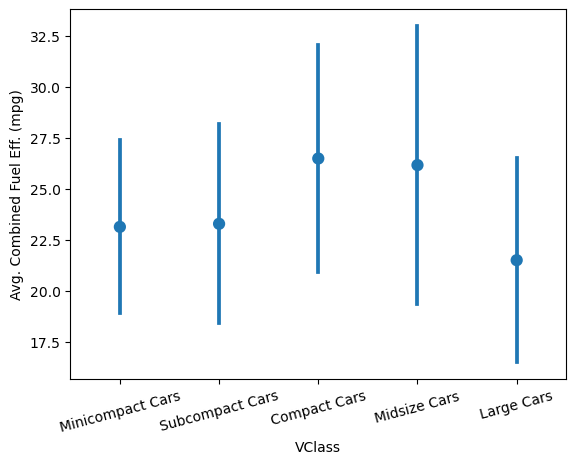

In [10]:
sns.pointplot(data=df, x='VClass', y='comb', errorbar='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

### Example 2B - Multivariate Example (2 categorical & one quantitative)

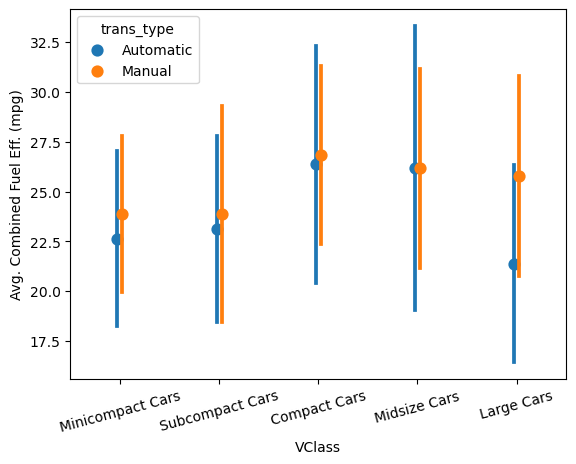

In [11]:
sns.pointplot(data=df, x='VClass', y='comb', hue='trans_type', errorbar='sd', linestyles="", dodge=True)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

### Example 3 - Errorbar #2

In [12]:
# Get the list of manufacturers meeting the threshold
THRESHOLD = 80
make_freqs = df['make'].value_counts()
most_makes = make_freqs[make_freqs >= THRESHOLD]

df_sub = df.loc[df['make'].isin(most_makes.index)]

<Axes: xlabel='comb', ylabel='make'>

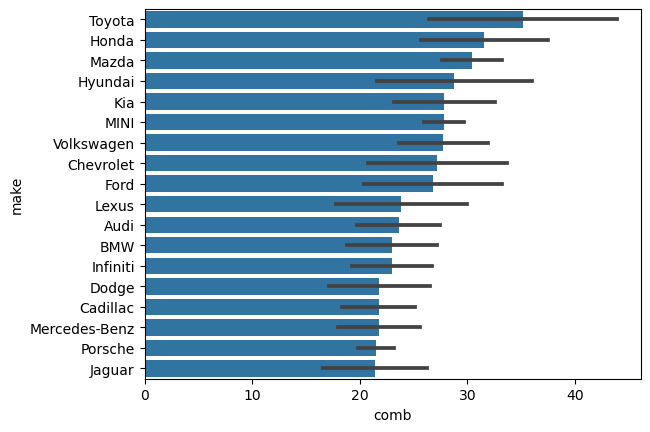

In [13]:
# Get the sorted order of manufacturers for combined fuel efficiency
comb_means_order = df_sub.groupby('make')['comb'].mean().sort_values(ascending=False).index

sns.barplot(data=df_sub, x='comb', y='make', color=base_color, order=comb_means_order, errorbar='sd')